https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

In [1]:
%config IPCompleter.greedy=True

In [2]:
import sklearn
print(dir(sklearn))

['__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_distributor_init', 'base', 'clone', 'config_context', 'exceptions', 'get_config', 'logger', 'logging', 'os', 'random', 'set_config', 'setup_module', 'show_versions', 'sys', 'utils']


# Vid 03 Classification in code
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
print(type(data))
print(data.data.shape)

<class 'sklearn.utils.Bunch'>
(569, 30)


In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
print(data.target)
print(data.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [13]:
model = RandomForestClassifier()
model.fit(X_train, y_train);

In [14]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9627659574468085


In [15]:
predictions = model.predict(X_test)
print(predictions)

[0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1
 1 1 1]


In [16]:
N = len(y_test)
acc = np.sum(predictions == y_test)/N
print(np.sum(predictions == y_test))
print(N)
print(acc)

181
188
0.9627659574468085


In [17]:
# True == 1 , False == 0
np.sum([True,False,True,False,True])

3

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

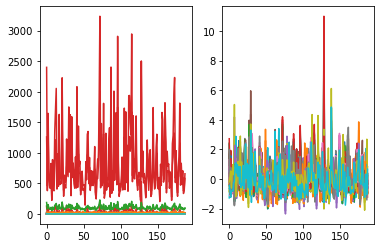

In [19]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)
# print(X_test2)
# print(X_test)

plt.subplot(1,2,1)
plt.plot(X_test);
plt.subplot(1,2,2)
plt.plot(X_test2);


In [20]:
model = MLPClassifier() # max_iter=500
model.fit(X_train2, y_train);

C:\Users\Tohid\anaconda\envs\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
print(model.score(X_train2, y_train))
print(model.score(X_test2, y_test))

0.989501312335958
0.9893617021276596


In [22]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# Vid 05 Regression in code

In [23]:
# numbers in reg has meaning

In [67]:
# [![Alt Text](./images/2.jpg "MSE")]()
# ![Alt Text](./images/2.jpg "MSE")

![Alt Text](./images/1_mse.jpg "MSE")

![Alt Text](./images/2.jpg "MSE")

![Alt Text](./images/3.jpg "MSE") 

In [65]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [30]:
df = pd.read_csv("./airfoil_self_noise.dat", sep='\t', header=None)

In [33]:
print(df.head())

      0    1       2     3         4        5
0   800  0.0  0.3048  71.3  0.002663  126.201
1  1000  0.0  0.3048  71.3  0.002663  125.201
2  1250  0.0  0.3048  71.3  0.002663  125.951
3  1600  0.0  0.3048  71.3  0.002663  127.591
4  2000  0.0  0.3048  71.3  0.002663  127.461


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1503 non-null   int64  
 1   1       1503 non-null   float64
 2   2       1503 non-null   float64
 3   3       1503 non-null   float64
 4   4       1503 non-null   float64
 5   5       1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None


In [37]:
data = df[[0,1,2,3,4]].values
target = df[5].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train);

In [60]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
# R^2 is score in LinearRegression

0.5157059039672433
0.5133646539051615


In [61]:
predictions = model.predict(X_test)

In [63]:
# predictions

In [66]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9894429734783367
0.9313679199949737


# Vid 06 Feature Vector

![Alt Text](./images/4.jpg "MSE")

![Alt Text](./images/5.jpg "MSE")

# Vid 09 Dif ML models

![Alt Text](./images/6.jpg "MSE")